In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

# Part 0: Seed

In [2]:
torch.manual_seed(42)

# Part 1: Arrays operations just like NumPy

In [3]:
# More examples of array operations
tens_1 = torch.arange(1, 6, dtype=torch.float32)
tens_2 = torch.randint_like(tens_1, 1, 10)
tens_3 = torch.linspace(1, 2, 5, dtype=torch.float32)
mat_1 = torch.rand(3, 3)
mat_2 = torch.rand(3, 3)

# Exponentiation, logarithm, and element-wise square root

c = torch.exp(tens_1)
d = torch.log(tens_3)
e = torch.sqrt(tens_1)
e_2 = tens_1 ** 0.5
is_close = torch.allclose(e, e_2)
f = tens_1 ** 2
g = tens_1 + tens_2
h = tens_1 * tens_2
i = mat_1 @ mat_2  # (matrix multiplication)
j = mat_1 * mat_2  # (element-wise multiplication)
k = mat_1 + mat_2  # (element-wise addition)

print("Tensor a:\n\t", tens_1)
print("Tensor a_1\n\t:", tens_2)
print("Tensor b:\n\t", tens_3)
print("Matrix 1:\n\t", mat_1)
print("Matrix 2:\n\t", mat_2)

print("\n\n\nExamples:\n")
print("\nComparison:\n\t", tens_1 > 3)

print("\nExponentiation:\n\t", c)
print("\nLogarithm:\n\t", d)
print("\nSquare root:\n\t", e)
print("\nAre the square roots equal?\n\t", is_close)
print("\nElement-wise square:\n\t", f)
print("\nElement-wise addition:\n\t", g)
print("\nElement-wise multiplication:\n\t", h)
print("\nMatrix multiplication:\n\t", i)
print("\nElement-wise multiplication:\n\t", j)
print("\nElement-wise addition:\n\t", k)
print(f"\n\nDid you get the point? :)")

Tensor a:
	 tensor([1., 2., 3., 4., 5.])
Tensor a_1
	: tensor([7., 6., 8., 5., 1.])
Tensor b:
	 tensor([1.0000, 1.2500, 1.5000, 1.7500, 2.0000])
Matrix 1:
	 tensor([[0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346],
        [0.5936, 0.8694, 0.5677]])
Matrix 2:
	 tensor([[0.7411, 0.4294, 0.8854],
        [0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969]])



Examples:


Comparison:
	 tensor([False, False, False,  True,  True])

Exponentiation:
	 tensor([  2.7183,   7.3891,  20.0855,  54.5981, 148.4132])

Logarithm:
	 tensor([0.0000, 0.2231, 0.4055, 0.5596, 0.6931])

Square root:
	 tensor([1.0000, 1.4142, 1.7321, 2.0000, 2.2361])

Are the square roots equal?
	 True

Element-wise square:
	 tensor([ 1.,  4.,  9., 16., 25.])

Element-wise addition:
	 tensor([ 8.,  8., 11.,  9.,  6.])

Element-wise multiplication:
	 tensor([ 7., 12., 24., 20.,  5.])

Matrix multiplication:
	 tensor([[0.8066, 0.6767, 0.9287],
        [1.0256, 0.8520, 1.1941],
        [1.0919, 0.7372, 1.2397]

# Part 2: Gradient-enabled Tensors and Manual Derivatives with Plots

Tensor x: tensor([0.], requires_grad=True)
Tensor y: tensor([9.], grad_fn=<PowBackward0>)
Gradient of y w.r.t. x: tensor([-6.])


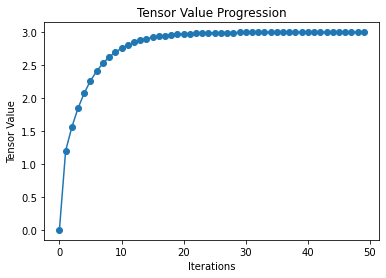

In [4]:
# Create a tensor with requires_grad=True to enable automatic differentiation
x = torch.tensor([0.], requires_grad=True)

# Perform a single iteration and print the Gradient
y = (x - 3.) ** 2
y.backward()
print("Tensor x:", x)
print("Tensor y:", y)
print("Gradient of y w.r.t. x:", x.grad)

# Perform multiple iterations and plot the tensors
x_values = []
for i in range(50):
    y = (x - 3.) ** 2
    y.backward()

    # Store the y values for plotting
    x_values.append(x.item())

    # Manually update x to simulate optimization
    with torch.no_grad():
        x -= 0.1 * x.grad
        x.grad.zero_()

# Plot the tensor values through iterations
plt.plot(x_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Tensor Value')
plt.title('Tensor Value Progression')
plt.show()

# Part 3: Working with GPU

In [5]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

x = torch.arange(10)
print("Tensor x:", x)
print("Tensor x Device (CPU):", x.device)

# Move the model and tensors to GPU if available
x.to(device)

print("Tensor x Device (GPU):", x.device)

Using device: cpu
Tensor x: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor x Device (CPU): cpu
Tensor x Device (GPU): cpu


# Part 4: Defining a Dataset

In [6]:
# Create a simple dataset and DataLoader
class DummyDataset(torch.utils.data.Dataset):
    """
    Any dataset should inherit from torch.utils.data.Dataset and override the __len__ and __getitem__ methods.
    __init__ is optional.
    __len__ should return the size of the dataset.
    __getitem__ should return a tuple (data, label) for the given index.
    """

    def __init__(self, size=1000):
        self.data = torch.rand(size, 2)
        self.labels = torch.round(self.data.sum(dim=1)).to(torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [7]:
dummy_dataset = DummyDataset(size=100)
print("First Sample in Dataset", dummy_dataset[0])
print(f"Length of dataset", len(dummy_dataset))
print('\n')

# loop over the samples in the dataset, in batches of 32
dataloader = torch.utils.data.DataLoader(dummy_dataset, # dataset to loop over
                                         batch_size=32, # batch size
                                         shuffle=True # if true shuffles the examples. Else uses 
                                        )

for inputs, labels in dataloader:
    print(inputs.shape, len(labels))
    
# Last batch might be smaller (it is len(dataset) % batch_size)

First Sample in Dataset (tensor([0.8317, 0.1053]), tensor(1))
Length of dataset 100


torch.Size([32, 2]) 32
torch.Size([32, 2]) 32
torch.Size([32, 2]) 32
torch.Size([4, 2]) 4


# Part 5: Defining a Linear Model

In [8]:
class SimpleLinearModel(nn.Module):
    def __init__(self, in_ch=2, out_ch=1):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(in_features=in_ch, out_features=out_ch)  # linear optimizable operation

    def forward(self, x):
        return self.linear(x)



In [9]:
# Define the linear model
model = SimpleLinearModel()

# YOU SHOULD NOT REPLACE A MODELS PARAMETERS MANUALLY IN PRACTICE! 
# This is just for the purpose of this tutorial

# Switch the parameters to an identity matrix
identity_matrix = torch.eye(2)
model.linear.weight.data = identity_matrix
model.linear.bias.data.zero_()

# Multiply by some vector
input_vector = torch.tensor([2.0, 3.0])  # Example input vector
result = model(input_vector)

# Display the results
print("Original vector:", input_vector)
print("Result after multiplying by the identity matrix:", result.detach().numpy())
# results should be the same

Original vector: tensor([2., 3.])
Result after multiplying by the identity matrix: [2. 3.]


# Part 6: Optimizers (Automatic SGD)

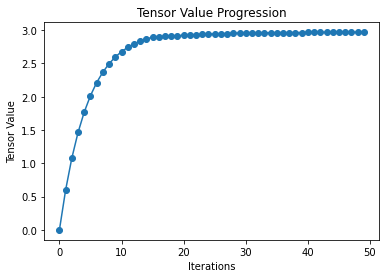

In [10]:

# Create a tensor with requires_grad=True to enable automatic differentiation
x = torch.tensor([0.0], requires_grad=True)

# Define an optimizer (e.g., SGD) and set the learning rate
optimizer = torch.optim.SGD([x], lr=0.1)

# Define a learning rate scheduler (OPTIONAL)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 
                                               step_size=15, # rate of decay
                                               gamma=0.3 # how much to decay the learning rate
                                              )

# Perform multiple iterations and plot the tensors
x_values = []

for i in range(50):
    y = (x - 3.) ** 2
    y.backward()
    x_values.append(x.item())

    optimizer.step() # Use the optimizer to update x
    optimizer.zero_grad() # Manually zero the gradient after updating
    lr_scheduler.step()

# Plot the tensor values through iterations
plt.plot(x_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Tensor Value')
plt.title('Tensor Value Progression')
plt.show()


# Part 7: Putting it all together - Full Optimization Loop

Epoch [1/100], Loss: 1.0544, Accuracy: 0.28
Epoch [2/100], Loss: 1.0222, Accuracy: 0.41
Epoch [3/100], Loss: 0.9928, Accuracy: 0.54
Epoch [4/100], Loss: 0.9661, Accuracy: 0.68
Epoch [5/100], Loss: 0.9421, Accuracy: 0.76
Epoch [6/100], Loss: 0.9204, Accuracy: 0.79
Epoch [7/100], Loss: 0.9005, Accuracy: 0.82
Epoch [8/100], Loss: 0.8826, Accuracy: 0.82
Epoch [9/100], Loss: 0.8666, Accuracy: 0.82
Epoch [10/100], Loss: 0.8520, Accuracy: 0.81
Epoch [11/100], Loss: 0.8391, Accuracy: 0.80
Epoch [12/100], Loss: 0.8271, Accuracy: 0.78
Epoch [13/100], Loss: 0.8167, Accuracy: 0.77
Epoch [14/100], Loss: 0.8063, Accuracy: 0.77
Epoch [15/100], Loss: 0.7978, Accuracy: 0.76
Epoch [16/100], Loss: 0.7925, Accuracy: 0.75
Epoch [17/100], Loss: 0.7903, Accuracy: 0.75
Epoch [18/100], Loss: 0.7876, Accuracy: 0.75
Epoch [19/100], Loss: 0.7855, Accuracy: 0.75
Epoch [20/100], Loss: 0.7834, Accuracy: 0.75
Epoch [21/100], Loss: 0.7812, Accuracy: 0.74
Epoch [22/100], Loss: 0.7796, Accuracy: 0.74
Epoch [23/100], Los

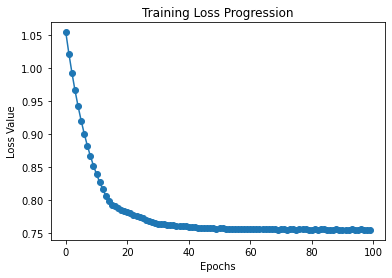

Test Accuracy: 0.70


In [13]:
# Instantiate the dataset and DataLoader
dummy_dataset = DummyDataset(size=3000)
test_dataset = DummyDataset(size=20)

n_classes = len(torch.unique(dummy_dataset.labels))

dataloader = torch.utils.data.DataLoader(dummy_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the model, loss function, and optimizer
model = SimpleLinearModel(in_ch=2, out_ch=n_classes)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.3)

# Train the model for a few epochs with GPU acceleration
num_epochs = 100
ep_loss_values = []

for epoch in range(num_epochs):
    loss_values = []
    ep_correct_preds = 0.
    model.train()  # set the model to training mode
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        # Store the loss values for plotting
        loss_values.append(loss.item())
        ep_correct_preds += torch.sum(torch.argmax(outputs, dim=1) == labels).item()

    lr_scheduler.step()

    mean_loss = np.mean(loss_values)
    ep_accuracy = ep_correct_preds / len(dummy_dataset)
    ep_loss_values.append(mean_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {mean_loss.item():.4f}, Accuracy: {ep_accuracy:.2f}')

# Plot the loss values through epochs
plt.plot(ep_loss_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Training Loss Progression')
plt.show()

# Evaluate the model on the test set
model.eval()  # set the model to evaluation mode
correct_predictions = 0.
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    outputs = nn.functional.softmax(outputs, dim=1)
    _, predicted = torch.max(outputs, dim=1)
    correct_predictions += torch.sum(predicted == labels).item()

print(f'Test Accuracy: {correct_predictions / len(test_dataset):.2f}')

# Part 8: Saving and Loading Models and accessing model parameters

In [12]:
# save model
torch.save(model.state_dict(), 'model.pt')

# to load model- i) create an instance of the model ii) load the state dict
loaded_model = SimpleLinearModel(in_ch=2, out_ch=n_classes)
loaded_model.load_state_dict(torch.load('model.pt'))

# access the model parameters and check their all close
model_weights = model.linear.weight.data
loaded_model_weights = loaded_model.linear.weight.data
print("Is loaded model same as original model?", torch.allclose(model_weights, loaded_model_weights))

Is loaded model same as original model? True
